#  **Regresión Lineal**

#### **Aprendizaje Supervisado**

Recordando lo visto en la Unidad 1, en el aprendizaje supervisado, cuando la variable objetivo es continua,  para predecir se utilizan algoritmos de regresión.

# **Regresión Lineal**

En estadística se conoce como regresión lineal a un modelo matemático que se utiliza para describir una variable de respuesta continua como una función de una o más variables explicativas.  Dicho en otras palabras, se busca una función que aplicada a los atributos se obtenga el valor esperado de la variable objetivo.
Los modelos lineales predicen la variable objetivo de manera simple basándose en relaciones lineales entre una variable de respuesta y una o más variables explicativas, es decir la variable de objetivo es dependiente linealmente de la/s variables explicativas (atributos). Como ya se ha visto en apartados anteriores las variables de entrada deben ser independientes entre sí.




## Modelo Regresión Simple

En la regresión lineal simple, se busca la relación del tipo entre una variable regresora X, que ante cambios en la misma provocan cambios en la variable objetivo Y . La ecuación que representa a dicha función es: 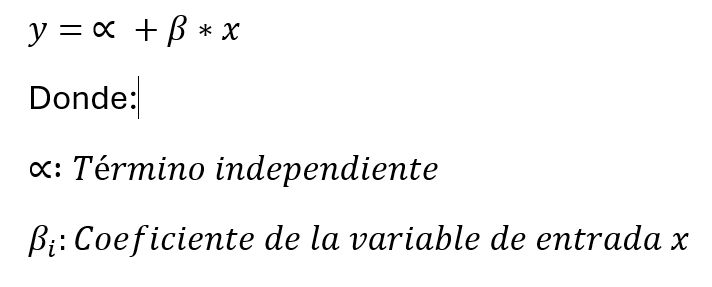

# Librerías

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

%matplotlib inline

## Importación y análisis exploratorio

In [18]:
dfIris=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSLgU6YF5djPgcJvcmXyqdIjfVefPsYlj6HUnRH15sZwsEL4GX7KPY-c3CWgM3n8vCljid-ZPocdAAl/pub?output=csv')

In [19]:
dfIris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
#Renombrado de columnas
dfIris.rename({'SepalLengthCm':'sepalo_largo',
           'SepalWidthCm':'sepalo_ancho',
           'PetalLengthCm':'petalo_largo',
           'PetalWidthCm':'petalo_ancho',
           'Species':'especies'},
          axis=1, inplace=True) # inplace = True para que el renombrado sea sobre el mismo df
dfIris.drop('Id', axis=1, inplace=True)



In [21]:
dfIris.shape

(150, 5)

In [22]:
dfIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepalo_largo  150 non-null    float64
 1   sepalo_ancho  150 non-null    float64
 2   petalo_largo  150 non-null    float64
 3   petalo_ancho  150 non-null    float64
 4   especies      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
dfIris.describe()

,sepalo_largo,sepalo_ancho,petalo_largo,petalo_ancho
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
# sns.heatmap(dfIris.corr(), annot=True,cmap='Blues')

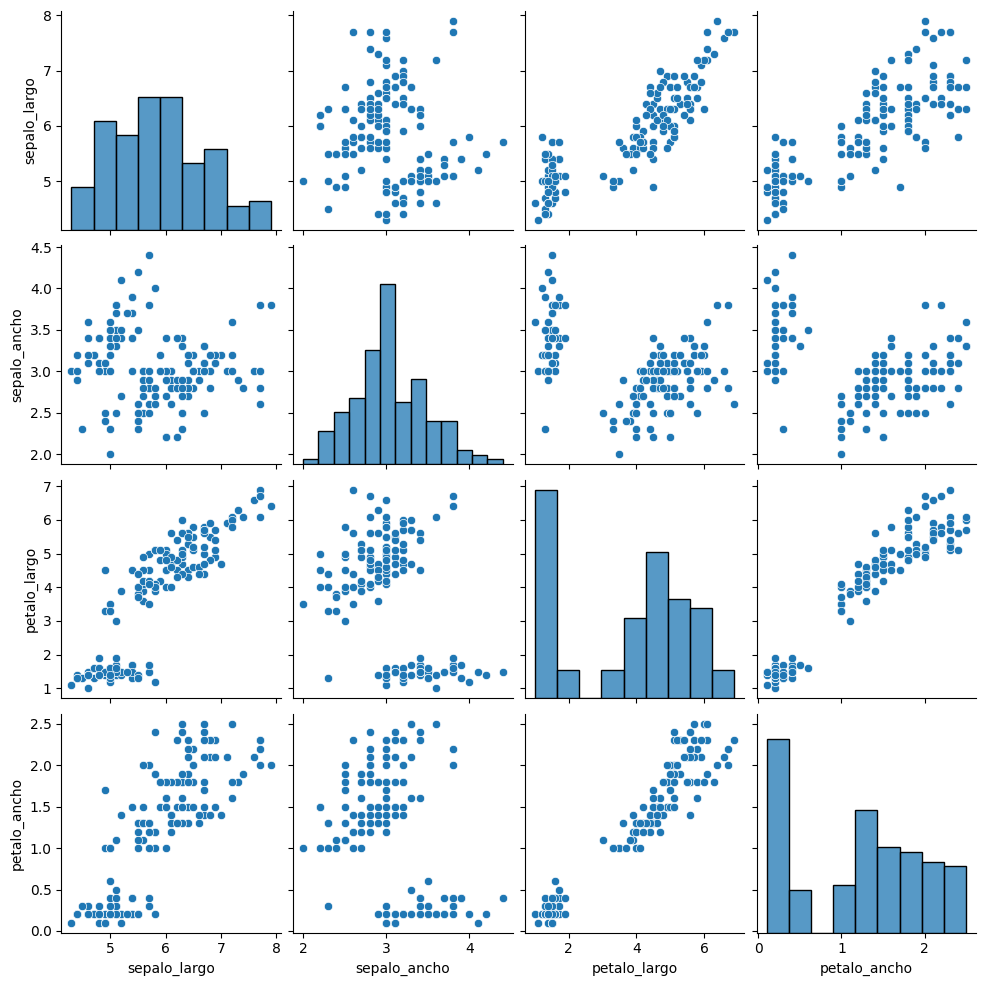

In [25]:
sns.pairplot(dfIris)

#  Particionamiento y entrenamiento

Vamos a predecir el ancho del pétalo, viendo los gráficos y la correlación utilizaremos la variable petalo largo como entrada

In [26]:
# Separo en X los atributos , en y las etiquetas
X = dfIris[['petalo_largo']].values
y = dfIris['petalo_ancho'].values


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Modelo de regresión Lineal

In [28]:
regresion = LinearRegression()

In [29]:
regresion.fit(X_train, y_train)

LinearRegression()

##  Evaluacion del modelo

In [30]:
regresion.coef_

array([0.42607684])

## Prediccion

In [31]:
y_pred = regresion.predict(X_test)

## Métricas de evaluación



> - **Mean Absolute Error - Error Absoluto medio** (MAE) es el promedio de los errores absolutos:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error - Error cuadratico medio** (MSE) es el promedio del cuadrado de los errores:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error - Raiz del error cuadrático medio** (RMSE) es la raiz cuadrada del cuadrado de los errores:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> Comparando las métricas:
- **MAE** es la más fácil de comprender porque es el error promedio.
- **MSE** es más popular que MAE, porque MSE "castiga" errores más grandes, lo que tiende a ser útil en el mundo real.
- **RMSE** es incluso más popular que MSE, porque RMSE se puede interpretar en las unidades "y".

> Todas son funciones de pérdida, es decir que debemos minimizarlas.


In [32]:
dfIris['petalo_ancho'].mean()

np.float64(1.1986666666666668)

In [33]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [34]:
MAE

np.float64(0.1500456207478458)

In [35]:
MSE

np.float64(0.0426646495429348)

In [36]:
RMSE

np.float64(0.20655422906088078)

## **Histograma de residuos**

Los residuos deberían comportarse de manera normal


In [37]:
test_residual= y_test - y_pred

In [38]:
pd.DataFrame({'Errores': (test_residual)}).hvplot.kde()

:Distribution   [Errores]   (Density)

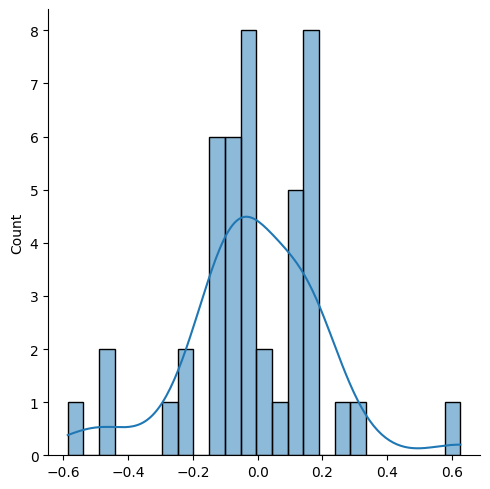

In [39]:
sns.displot(test_residual, bins=25, kde=True)

El gráfico demuestra una distribución cercana a la normal de los residudos por lo tanto podría decirse que el modelo se ajusta bastante bien a las observaciones por lo tanto es un buen modelo

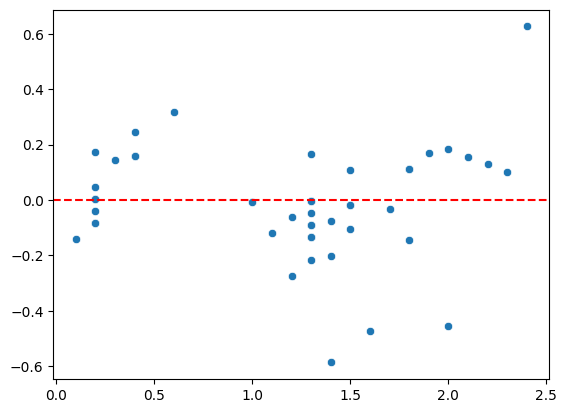

In [40]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')

## Coeficiente de determinación o R cuadrado
Otra métrica muy usada es el **Coeficiente de determinación o R cuadrado**: Es la proporción de la varianza de la variable explicada por la regresión. Varía entre 0 y 1, siendo 0 el peor valor.

In [41]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.9022272471544487


Siendo que el coeficiente de determinación da cercano a 1 puede decirse que el modelo predice adecuadamente